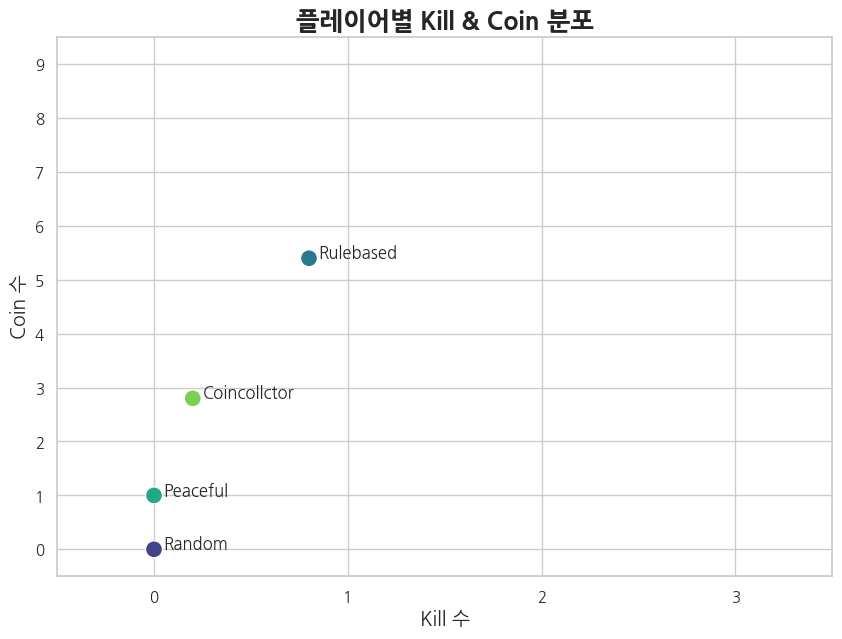

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.font_manager as fm

# 한글 폰트 설정 (Windows, Mac, Linux 환경에 맞게 경로 수정 필요)
# Colab, Kaggle 등 클라우드 환경에서는 추가적인 폰트 설치 코드가 필요할 수 있습니다.
# 예: !sudo apt-get install -y fonts-nanum*
# fm._rebuild()
sns.set_theme(style="whitegrid")
plt.rc('font', family='NanumGothicOTF') # Windows: 'Malgun Gothic', Mac: 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨짐 방지

# 1. 데이터 준비 (예시)
# 실제 데이터는 이 형식에 맞게 입력하시면 됩니다.
data = {'name': ['Random', 'Rulebased', 'Peaceful', 'Coincollctor'],
        'kill': [0, 0.8, 0, 0.2],
        'coin': [0, 5.4, 1, 2.8]}
df = pd.DataFrame(data)

# 2. 그래프 그리기
# 그래프의 크기와 스타일 설정
plt.figure(figsize=(10, 7))


# scatterplot으로 점 그래프 생성
ax = sns.scatterplot(x='kill', y='coin', data=df, s=150, legend=False, hue='name', palette='viridis')

# 3. 그래프 꾸미기
# 각 점에 이름 표시
for i, row in df.iterrows():
    plt.text(row['kill'] + 0.05, row['coin'], row['name'], fontsize=12)

# 축 범위 설정
plt.xlim(-0.5, 3.5)
plt.ylim(-0.5, 9.5)

# 제목 및 축 이름 설정
plt.title('플레이어별 Kill & Coin 분포', fontsize=18, fontweight='bold')
plt.xlabel('Kill 수', fontsize=14)
plt.ylabel('Coin 수', fontsize=14)

# 눈금 설정
plt.xticks(ticks=[0, 1, 2, 3])
plt.yticks(ticks=range(0, 10))

# 그래프 표시
plt.show()

In [7]:
!pip install plotly
!pip install nbformat --upgrade nbformat

In [ ]:
import plotly.express as px
import pandas as pd

# 1. 데이터 준비 (예시)
data = {'이름': ['PlayerA', 'PlayerB', 'PlayerC', 'PlayerD'],
        'kill': [3, 1, 0, 2],
        'coin': [8, 5, 9, 3]}
df = pd.DataFrame(data)

# 2. 인터랙티브 그래프 생성
fig = px.scatter(df,
                 x='kill',
                 y='coin',
                 text='이름',  # 점 근처에 텍스트 표시
                 hover_name='이름', # 마우스를 올렸을 때 표시될 이름
                 hover_data={'kill': True, 'coin': True, '이름': False}, # 호버 데이터 커스텀
                 title='<b>플레이어별 Kill & Coin 분포 (Interactive)</b>'
                )

# 3. 그래프 레이아웃 업데이트
fig.update_traces(textposition='top center', textfont_size=12) # 텍스트 위치 및 크기

fig.update_layout(
    xaxis_title='Kill 수',
    yaxis_title='Coin 수',
    xaxis=dict(range=[-0.5, 3.5], tickvals=[0, 1, 2, 3]), # x축 범위 및 눈금
    yaxis=dict(range=[-0.5, 9.5]), # y축 범위
    font=dict(family="Malgun Gothic, AppleGothic, sans-serif", size=12),
    title_font_size=18
)


# 그래프 표시
fig.show()

In [6]:
import matplotlib
import matplotlib.font_manager as fm
import os

# 폰트 캐시 파일 경로 가져오기
font_cache_path = matplotlib.get_cachedir()
print(f"Matplotlib 폰트 캐시 폴더: {font_cache_path}")

# 폴더 내의 fontlist-vXXX.json 파일들 삭제
for file in os.listdir(font_cache_path):
    if file.startswith('fontlist-v') and file.endswith('.json'):
        os.remove(os.path.join(font_cache_path, file))
        print(f"'{file}' 캐시 파일을 삭제했습니다.")

Matplotlib 폰트 캐시 폴더: C:\Users\jw\.matplotlib
'fontlist-v390.json' 캐시 파일을 삭제했습니다.


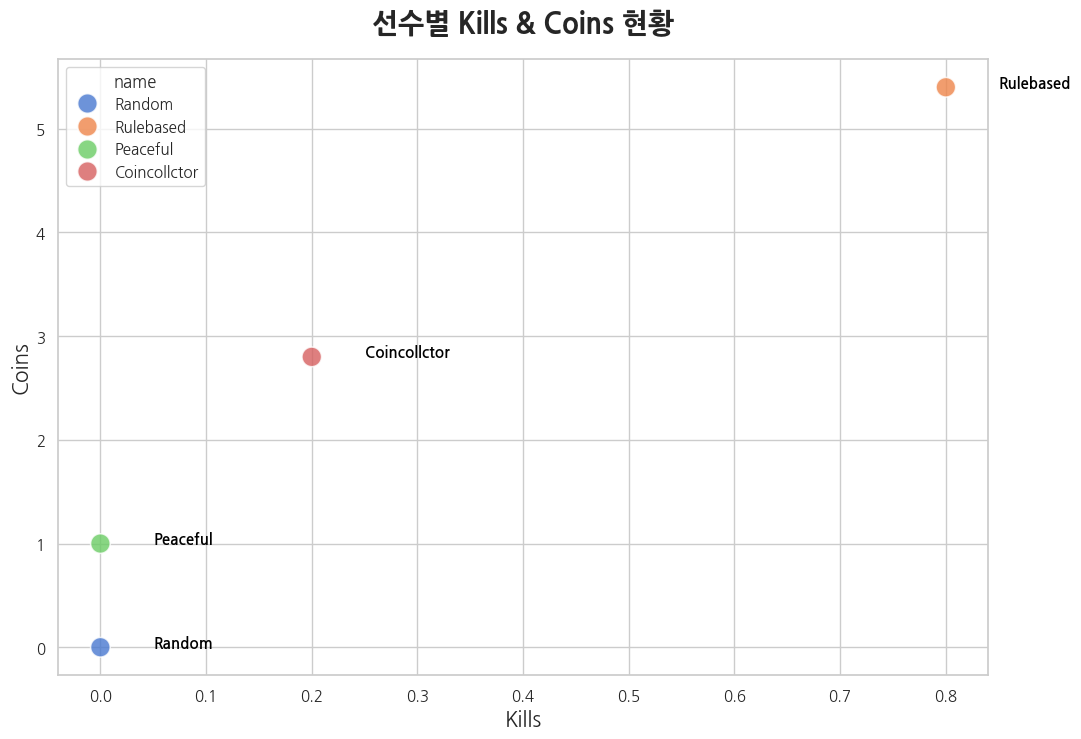

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.font_manager as fm

# ==================== 사용자 입력 영역 ====================
# 여기에 플레이어 데이터를 입력하세요.
player_data = [
    {'name': 'Random', 'kill': 0, 'coin': 0},
    {'name': 'Rulebased', 'kill': 0.8, 'coin': 5.4},
    {'name': 'Peaceful', 'kill': 0, 'coin': 1},
    {'name': 'Coincollctor', 'kill': 0.2, 'coin': 2.8},
]
# =======================================================
sns.set_theme(style="whitegrid", palette="muted")

# 폰트 설정 (환경에 맞게 수정)
# 아래 코드 실행 후에도 한글이 깨지면, 사용 중인 OS에 맞는 폰트 이름을 확인하여 'font_name' 변수를 수정해주세요.
try:
    # Windows
    font_name = 'NanumGothicOTF'
    plt.rc('font', family=font_name)
except:
    try:
        # Mac
        font_name = 'AppleGothic'
        plt.rc('font', family=font_name)
    except:
        font_name = 'NanumGothic'
        plt.rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False

# 데이터프레임 생성
df = pd.DataFrame(player_data)

# 그래프 생성
plt.figure(figsize=(12, 8))

# 산점도 그리기
plot = sns.scatterplot(
    x='kill',
    y='coin',
    data=df,
    s=200,  # 점 크기
    alpha=0.8, # 투명도
    hue='name', # 이름별로 색상 구분
    legend=True # 범례 숨기기
)

# 각 점에 이름 텍스트 추가
for i in range(df.shape[0]):
    plt.text(
        x=df.kill[i] + 0.05,
        y=df.coin[i],
        s=df.name[i],
        fontdict=dict(color='black', size=11, weight='semibold')
    )
                 
# 그래프 제목 및 라벨
plt.title('선수별 Kills & Coins 현황', fontsize=20, pad=20, fontweight='bold')
plt.xlabel('Kills', fontsize=15)
plt.ylabel('Coins', fontsize=15)

# # 축 범위 및 눈금 설정
# plt.xlim(-1, 1)
# plt.ylim(-6, 6)
# plt.xticks(ticks=[i for i in range(-2,2)], fontsize=12)
# plt.yticks(ticks=[i for i in range(-6,6)], fontsize=12)

# # 그리드를 더 촘촘하게 표시
# plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# # # 그래프를 이미지 파일로 저장
# # plt.savefig('player_kill_coin_graph.png', dpi=300, bbox_inches='tight')

# # 그래프 보여주기
# plt.show()
# --- 4. 축(Spines)을 (0,0) 중심으로 이동 및 스타일링 (핵심 요청사항) ---
# 위쪽과 오른쪽 테두리(spine)를 보이지 않게 설정
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 아래쪽 테두리를 y=0 위치로 이동
ax.spines['bottom'].set_position(('data', -5))
# 왼쪽 테두리를 x=0 위치로 이동
ax.spines['left'].set_position(('data', -2))

# 이동한 축을 강조하기 위해 색상과 두께 설정
ax.spines['bottom'].set_color('red')
ax.spines['left'].set_color('red')
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)

# --- 5. 제목 및 라벨 설정 ---
ax.set_title('에이전트별 Kills & Coins 분포', fontsize=20, pad=20, fontweight='bold')
# 라벨 위치를 축의 끝으로 조정
ax.set_xlabel('Kills', fontsize=15, loc='right')
ax.set_ylabel('Coins', fontsize=15, loc='top', rotation=0)

# --- 6. 축 범위 및 눈금 설정 ---
ax.set_xlim(-1, 1)
ax.set_ylim(-6, 6)
ax.set_xticks([i/2 for i in range(-2, 3, 1)]) # 눈금을 0.5 단위로 설정
ax.set_yticks([i for i in range(-6, 7, 2)])   # 눈금을 2 단위로 설정

# --- 7. 그리드 제거 ---
ax.grid(False)

# 그래프 보여주기
plt.show()